# Rio Seg

## Dados
### Base DP: evolução mensal das estatísticas por circunscrição de Delegacia (1/2003 a 04/2017)
BaseDPEvolucaoMensalCisp.csv
### Séries históricas do estado por mês desde 1991
DOMensalEstadoDesde1991.csv
### População mensal por circunscrição de Delegacia
PopulacaoEvolucaoMensalCisp.xlsx

## Importando Dependencias

In [1]:
%matplotlib inline

import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

# Set ipython's max row display
#pd.set_option('display.max_row', 1000)

# Set iPython's max column width to 50
pd.set_option('display.max_columns', 50)

In [2]:
update_files = True
if(update_files):
    import urllib.request
    urllib.request.urlretrieve("http://www.ispdados.rj.gov.br/Arquivos/BaseDPEvolucaoMensalCisp.csv", "data/BaseDPEvolucaoMensalCisp.csv")
    urllib.request.urlretrieve("http://www.ispdados.rj.gov.br/Arquivos/PopulacaoEvolucaoMensalCisp.xlsx", "data/PopulacaoEvolucaoMensalCisp.xlsx")

## Lendo Dados

In [3]:
data = pd.read_csv('data/BaseDPEvolucaoMensalCisp.csv', encoding = "ISO-8859-1", sep=";")
data_pop = pd.read_excel('./data/PopulacaoEvolucaoMensalCisp.xlsx')
data_delegacias = pd.read_csv('./data/delegacias.csv', sep=';')
data_upps = pd.read_excel('data/UppDatasDeInstalacao.xlsx')

print(data.shape, data_pop.shape,data_delegacias.shape, data_upps.shape)

(23323, 60) (22865, 4) (138, 4) (42, 5)


In [26]:
data.tail(5)

,CISP,mes,vano,mes_ano,AISP,RISP,munic,mcirc,Regiao,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,...,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,recuperacao_veiculos,cump_mandado_prisao,armas_apreendidas,prisoes,grp,apf_cmp,apreensoes,gaai,aaapai_cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
23318,159,7,2017,2017m7,35,4,Cachoeiras de Macacu,3300803,Interior,3,0,0,0,0,11,2,1,22,0,0,1,0,5,0,0,...,0,1,0,2,4,2,9,1,NaN,13.0,13.0,NaN,1.0,1.0,18,1,0,0,0,0,3,5,1,141,2
23319,165,7,2017,2017m7,33,5,Mangaratiba,3302601,Interior,1,0,0,0,2,12,1,2,4,1,0,5,0,11,1,0,...,0,0,1,3,9,1,6,1,NaN,17.0,19.0,NaN,1.0,4.0,23,0,0,0,0,0,1,12,5,151,2
23320,166,7,2017,2017m7,33,5,Angra dos Reis,3300100,Interior,4,0,0,1,9,55,9,3,17,6,0,12,0,25,27,0,...,0,0,0,21,46,11,13,17,NaN,42.0,47.0,NaN,5.0,5.0,44,4,0,0,0,0,5,61,12,479,2
23321,167,7,2017,2017m7,33,5,Paraty,3303807,Interior,1,0,0,0,3,20,1,0,9,0,0,0,0,4,0,0,...,0,0,0,7,22,4,10,8,NaN,21.0,22.0,NaN,4.0,4.0,16,3,1,1,0,0,1,5,0,175,2
23322,168,7,2017,2017m7,33,5,Rio Claro,3304409,Interior,0,0,0,0,0,12,1,0,4,0,0,0,0,0,0,0,...,0,0,0,0,3,0,6,5,NaN,4.0,9.0,NaN,1.0,2.0,5,0,0,0,0,0,0,0,0,54,2


In [5]:
data_pop.head(5)

,circ,mes,vano,pop_circ
0,1,7,2006,1586.857274
1,1,8,2006,1587.866084
2,1,9,2006,1588.875536
3,1,10,2006,1589.885630
4,1,11,2006,1590.896366


In [6]:
data_delegacias.head(5)

,CISP,nome,endereco,delegado
0,1,001ª DP – Praça Mauá,Atendendo provisóriamente na sede da 4ªDP,Cláudio Vieira de Campos
1,4,004ª DP – Praça da República,"Praça Cristiano Ottoni, s/nº",Daniel Mayr Pereira da Costa
2,5,005ª DP – Mem de Sá,"Av. Gomes Freire, 320 - Centro",Marcus Henrique de Oliveira Alves
3,6,006ª DP – Cidade Nova,"Rua Prof. Clementino Fraga, 77",Maria Aparecida Salgado Mallet
4,7,007ª DP – Santa Teresa,"Rua Francisco de Castro, 5",Orlando Zaccone D Elia Filho


## Join

In [7]:
data_pop['CISP'] = data_pop['circ']
data_join = pd.merge(data, data_pop, how="inner", on=['CISP', 'mes', 'vano'])
data_join.shape

(17897, 62)

In [8]:
#Normalizar para 100.000 habitantes
data_join['per100k_ratio'] = data_join['pop_circ'] / 100000

## Limpeza de Dados

In [9]:
#Limpeza de NaN
#Aplicando a média por CISP
cols = ['hom_doloso', 'lesao_corp_morte',
       'latrocinio', 'tentat_hom', 'lesao_corp_dolosa', 'estupro',
       'hom_culposo', 'lesao_corp_culposa', 'encontro_cadaver',
       'encontro_ossada', 'roubo_comercio', 'roubo_residencia',
       'roubo_veiculo', 'roubo_carga', 'roubo_transeunte',
       'roubo_em_coletivo', 'roubo_banco', 'roubo_cx_eletronico',
       'roubo_celular', 'roubo_conducao_saque', 'roubo_bicicleta',
       'outros_roubos', 'furto_veiculos', 'furto_bicicleta',
       'outros_furtos', 'sequestro', 'extorsao', 'sequestro_relampago',
       'estelionato', 'apreensao_drogas', 'recuperacao_veiculos',
       'cump_mandado_prisao', 'ameaca', 'pessoas_desaparecidas',
       'hom_por_interv_policial', 'armas_apreendidas', 'prisoes', 'grp',
       'apf_cmp', 'apreensoes', 'gaai', 'aaapai_cmba',
       'registro_ocorrencias', 'pol_militares_mortos_serv',
       'pol_civis_mortos_serv', 'indicador_letalidade',
       'indicador_roubo_rua', 'indicador_roubo_veic']

for c in cols:
    if(data_join[c].isnull().sum() > 0):
        data_join[c] = data_join[['CISP', c]].groupby('CISP').transform(lambda x: x.fillna(np.round(x.mean())))

In [10]:
#Criação de coluna Data
from datetime import date
data_join['data'] = pd.to_datetime(data_join[['vano', 'mes']].apply(lambda x : date(x['vano'], x['mes'],1), axis=1))
data_join['data'].head(5)

0   2006-07-01
1   2006-07-01
2   2006-07-01
3   2006-07-01
4   2006-07-01
Name: data, dtype: datetime64[ns]

In [11]:
data_join.describe()

,CISP,mes,vano,AISP,RISP,mcirc,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,...,estelionato,apreensao_drogas,recuperacao_veiculos,cump_mandado_prisao,armas_apreendidas,prisoes,grp,apf_cmp,apreensoes,gaai,aaapai_cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase,circ,pop_circ,per100k_ratio
count,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,1.789700e+04,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,...,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000
mean,81.805666,6.499134,2011.614461,20.090518,3.873778,3.793782e+06,3.123708,0.025591,0.111527,0.506621,3.037436,48.839079,2.914511,1.444823,25.732078,3.559647,0.875454,18.316478,3.051629,41.321115,5.458345,0.017992,0.026820,5.801699,0.071856,...,18.116835,11.032631,13.953847,9.250154,5.491647,13.543164,24.867296,31.712466,2.451416,5.919763,6.198525,45.069509,3.418282,0.346483,0.022741,0.012963,0.002459,3.767503,52.581159,18.316478,444.023691,2.969157,81.805666,119824.622655,1.198246
std,48.276204,3.439173,3.218880,11.374702,2.012337,1.744177e+06,4.525718,0.175672,0.394091,1.394147,4.175565,46.191600,3.739067,1.952266,25.494793,4.372266,1.314940,30.358031,7.143448,56.421214,9.938566,0.136247,0.172599,10.079831,0.314633,...,23.555986,14.513283,22.787102,16.491262,6.621593,16.543104,22.258328,29.161703,5.004200,6.538779,6.736605,43.918503,4.369812,0.716623,0.178428,0.127953,0.050640,5.347489,71.928840,30.358031,396.192567,0.172897,48.276204,107869.396529,1.078694
min,1.000000,1.000000,2006.000000,1.000000,1.000000,3.300100e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1586.857274,0.015869
25%,38.000000,4.000000,2009.000000,10.000000,2.000000,3.302601e+06,0.000000,0.000000,0.000000,0.000000,0.000000,16.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,3.000000,1.000000,2.000000,1.000000,2.000000,8.000000,10.000000,0.000000,1.000000,1.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,104.000000,3.000000,38.000000,32932.356586,0.329324
50%,78.000000,7.000000,2012.000000,20.000000,4.000000,3.304557e+06,1.000000,0.000000,0.000000,0.000000,2.000000,37.000000,2.000000,1.000000,20.000000,2.000000,0.000000,4.000000,1.000000,14.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,9.000000,7.000000,5.000000,5.000000,3.000000,7.000000,18.000000,22.000000,1.000000,4.000000,4.000000,32.000000,2.000000,0.000000,0.000000,0.000000,0.000000,2.000000,17.000000,4.000000,373.000000,3.000000,78.000000,93329.923595,0.933299
75%,125.000000,9.000000,2014.000000,30.000000,6.000000,3.304557e+06,4.000000,0.000000,0.000000,0.000000,4.000000,66.000000,4.000000,2.000000,37.000000,6.000000,1.000000,24.000000,3.000000,68.000000,7.000000,0.000000,0.000000,8.000000,0.000000,...,25.

## Estatisticas por 100k 

In [12]:
data_per100k = data_join.copy()
for c in cols:
    data_per100k[c] = data_per100k[c] * data_per100k['per100k_ratio']

In [13]:
data_per100k.head(5)

,CISP,mes,vano,mes_ano,AISP,RISP,munic,mcirc,Regiao,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,...,apreensao_drogas,recuperacao_veiculos,cump_mandado_prisao,armas_apreendidas,prisoes,grp,apf_cmp,apreensoes,gaai,aaapai_cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase,circ,pop_circ,per100k_ratio,data
0,1,7,2006,2006m7,5,1,Rio de Janeiro,3304557,Capital,0.000000,0.0,0.000000,0.00000,0.015869,0.317371,0.079343,0.00000,0.269766,0.063474,0.000000,0.031737,0.095211,1.158406,0.190423,0.000000,...,0.063474,0.063474,0.285634,0.047606,0.031737,0.285634,0.317371,0.000000,0.095211,0.111080,0.396714,0.063474,0.000000,0.0,0.0,0.0,0.000000,1.650332,0.031737,12.917018,3,1,1586.857274,0.015869,2006-07-01
1,4,7,2006,2006m7,5,1,Rio de Janeiro,3304557,Capital,1.223721,0.0,0.000000,0.61186,0.305930,7.342326,0.000000,0.61186,10.095698,0.305930,0.000000,3.977093,0.917791,20.803257,2.447442,0.000000,...,12.543140,1.529651,1.223721,4.283023,0.917791,9.483838,10.401628,0.000000,3.365233,3.365233,5.200814,0.305930,0.000000,0.0,0.0,0.0,1.835581,26.004071,3.977093,159.389658,3,4,30593.024604,0.305930,2006-07-01
2,5,7,2006,2006m7,13,1,Rio de Janeiro,3304557,Capital,0.000000,0.0,0.000000,0.00000,0.732353,18.675001,0.000000,0.00000,5.126471,3.661765,0.366176,2.563235,1.098529,35.152944,5.492647,0.366176,...,2.563235,2.929412,5.492647,1.464706,18.675001,30.026473,33.322061,0.000000,6.957353,7.323530,14.647060,1.830882,0.366176,0.0,0.0,0.0,0.000000,44.673533,2.563235,352.994145,3,5,36617.649935,0.366176,2006-07-01
3,6,7,2006,2006m7,1,1,Rio de Janeiro,3304557,Capital,6.266108,0.0,0.000000,0.00000,2.349791,26.630959,3.133054,0.00000,29.764014,5.482845,1.566527,19.581588,0.783264,31.330541,6.266108,0.000000,...,21.931378,51.695392,9.399162,10.965689,22.714642,17.231797,23.497905,0.000000,4.699581,4.699581,10.965689,1.566527,0.000000,0.0,0.0,0.0,6.266108,39.946439,19.581588,386.148913,3,6,78326.351467,0.783264,2006-07-01
4,7,7,2006,2006m7,1,1,Rio de Janeiro,3304557,Capital,0.000000,0.0,0.397006,0.00000,0.000000,1.588024,0.397006,0.00000,1.191018,0.397006,0.794012,4.367066,0.000000,5.558085,0.794012,0.000000,...,1.191018,5.955091,0.794012,1.985030,3.176048,1.588024,2.779042,0.397006,0.397006,0.397006,1.588024,0.397006,0.000000,0.0,0.0,0.0,0.397006,6.352097,4.367066,55.183839,3,7,39700.603614,0.397006,2006-07-01


In [14]:
data_per100k[data_per100k['vano'] == 2016].sort_values('roubo_veiculo', ascending=False)[['Regiao','munic','roubo_veiculo']]

,Regiao,munic,roubo_veiculo
16574,Baixada Fluminense,São João de Meriti,1340.853746
16712,Baixada Fluminense,São João de Meriti,1318.037684
16850,Baixada Fluminense,São João de Meriti,1207.637135
16022,Baixada Fluminense,São João de Meriti,1036.233013
15608,Baixada Fluminense,São João de Meriti,994.829046
16298,Baixada Fluminense,São João de Meriti,985.724263
16436,Baixada Fluminense,São João de Meriti,981.283848
16160,Baixada Fluminense,São João de Meriti,967.136100
15884,Baixada Fluminense,São João de Meriti,953.348860
16564,Baixada Fluminense,Belford Roxo,901.079599


In [15]:
data_per100k[data_per100k['vano'] == 2016].groupby(['CISP','munic']).sum().sort_values('roubo_veiculo', ascending=False)[['roubo_veiculo']].head(5)

,,roubo_veiculo
CISP,munic,
64,São João de Meriti,12226.123350
59,Duque de Caxias,6824.215832
35,Rio de Janeiro,6229.158324
54,Belford Roxo,6192.967369
34,Rio de Janeiro,5931.304742


## Exporting

In [16]:
data_per100k.to_csv('export/data_per100k.csv')

## Análise

In [17]:
import datetime as dt
def mark_period(init, end, color, style="--", width=1, interval=29):
    ax.axvline(init, color=color, linestyle=style, lw=width + 1)
    ax.axvline(end, color=color, linestyle=style, lw=width + 1)
    for i in range((end - init).days):
        if(i % interval == 0):
            ax.axvline(init + dt.timedelta(days=i), color=color, linestyle=style, lw=1)

### Análise por Governo

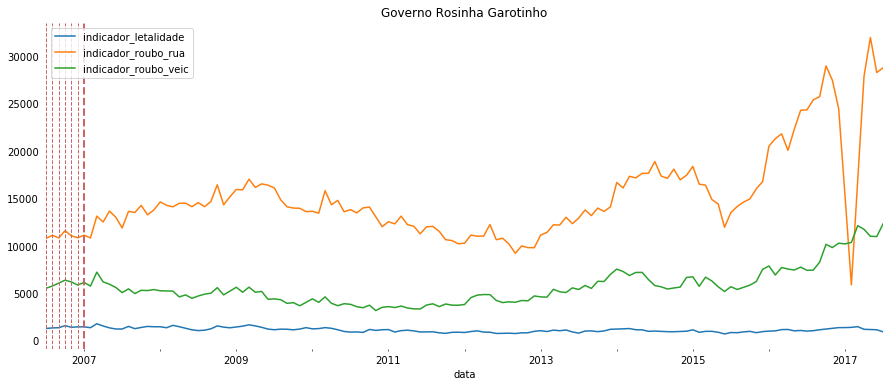

In [18]:
#Governo Rosinha
data_per100k.groupby(['data']).sum()[['indicador_letalidade','indicador_roubo_rua','indicador_roubo_veic']].plot(figsize=(15,6))

ax = plt.gca()

#GOVERNO
#ax.axvline(pd.to_datetime('2007-01-1'), color='#920000', linestyle='--', lw=2)
mark_period(dt.datetime(2003,1,1), dt.datetime(2007,1,1), '#CC6666')

plt.tick_params(bottom='off', top='off', left='off', right='off')
for spine in ax.spines:
    ax.spines[spine].set_visible(False)
ax.set_title('Governo Rosinha Garotinho')
ax.legend(loc='upper left')
plt.show()

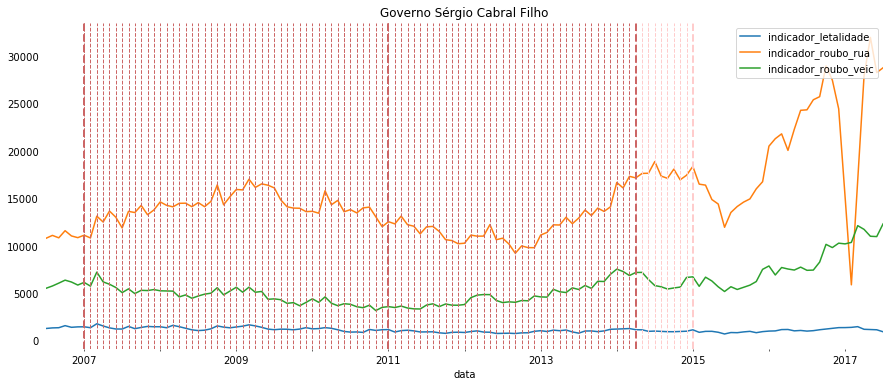

In [19]:
#Governo Cabral
data_per100k.groupby(['data']).sum()[['indicador_letalidade','indicador_roubo_rua','indicador_roubo_veic']].plot(figsize=(15,6))
ax = plt.gca()

#GOVERNO
mark_period(dt.datetime(2007,1,1), dt.datetime(2011,1,1), '#CC6666')
mark_period(dt.datetime(2014,4,4), dt.datetime(2015,1,1), '#FFCCCC')
mark_period(dt.datetime(2011,1,1), dt.datetime(2014,4,3), '#CC6666')

plt.tick_params(bottom='off', top='off', left='off', right='off')
for spine in ax.spines:
    ax.spines[spine].set_visible(False)
ax.set_title('Governo Sérgio Cabral Filho')
plt.show()

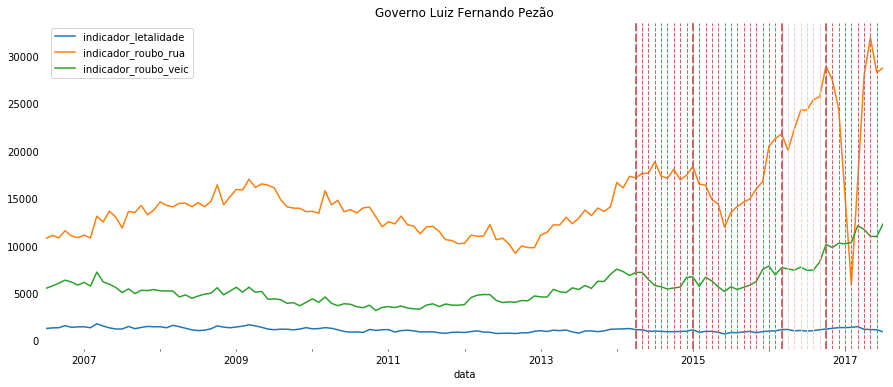

In [20]:
#Governo Luiz Fernando Pezão
data_per100k.groupby(['data']).sum()[['indicador_letalidade','indicador_roubo_rua','indicador_roubo_veic']].plot(figsize=(15,6))
ax = plt.gca()

#GOVERNO
ax.axvline(pd.to_datetime('2014-04-3'), color='#CC6666', linestyle='--', lw=2)
ax.axvline(pd.to_datetime('2015-01-1'), color='#CC6666', linestyle='--', lw=2)
ax.axvline(pd.to_datetime('2016-03-28'), color='#CC6666', linestyle='--', lw=1)
ax.axvline(pd.to_datetime('2016-10-31'), color='#CC6666', linestyle='--', lw=1)

mark_period(dt.datetime(2016,3,28), dt.datetime(2016,10,31), '#FFCCCC')
mark_period(dt.datetime(2014,4,3), dt.datetime(2015,1,1), '#CC6666')
mark_period(dt.datetime(2015,1,1), dt.datetime(2016,3,28), '#CC6666')
mark_period(dt.datetime(2016,10,31), dt.datetime.now(), '#CC6666')


plt.tick_params(bottom='off', top='off', left='off', right='off')
for spine in ax.spines:
    ax.spines[spine].set_visible(False)
ax.set_title('Governo Luiz Fernando Pezão')
plt.show()

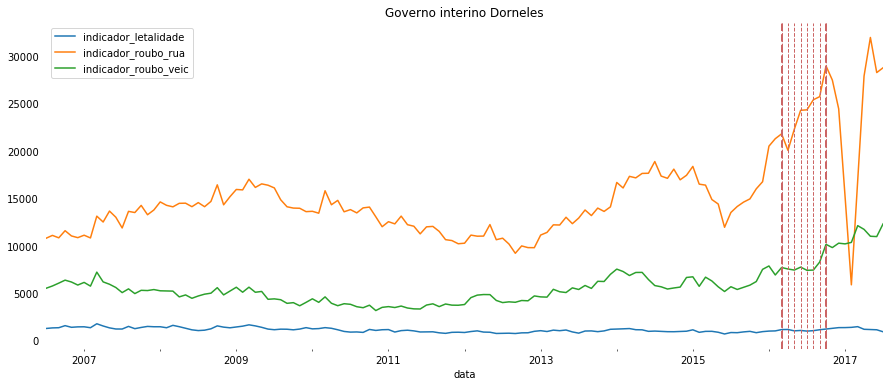

In [21]:
data_per100k.groupby(['data']).sum()[['indicador_letalidade','indicador_roubo_rua','indicador_roubo_veic']].plot(figsize=(15,6))

ax = plt.gca()
#Governo Dorneles
mark_period(dt.datetime(2016,3,28), dt.datetime(2016,10,31), '#CC6666')


plt.tick_params(bottom='off', top='off', left='off', right='off')
for spine in ax.spines:
    ax.spines[spine].set_visible(False)
ax.set_title('Governo interino Dorneles')
plt.show()

# UPPs

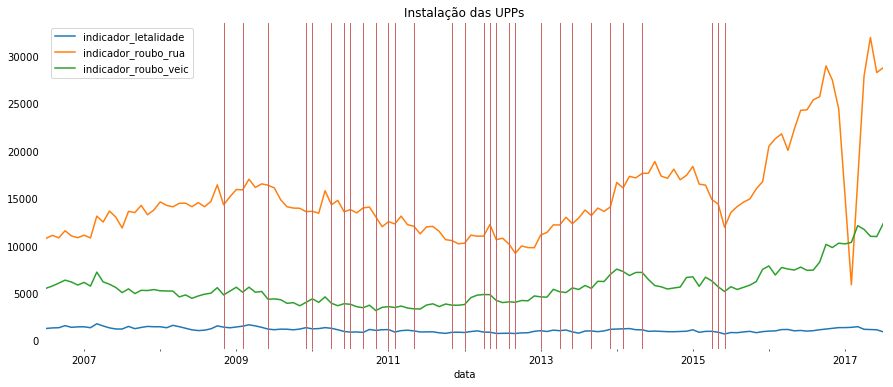

In [22]:
data_upps
data_per100k.groupby(['data']).sum()[['indicador_letalidade','indicador_roubo_rua','indicador_roubo_veic']].plot(figsize=(15,6))

ax = plt.gca()

for i in data_upps['Data'].values:
    
    ax.axvline(pd.to_datetime(i), color='#CC6666', linestyle='-', lw=1)


plt.tick_params(bottom='off', top='off', left='off', right='off')
for spine in ax.spines:
    ax.spines[spine].set_visible(False)
ax.set_title('Instalação das UPPs')
plt.show()

### Período Eleitoral

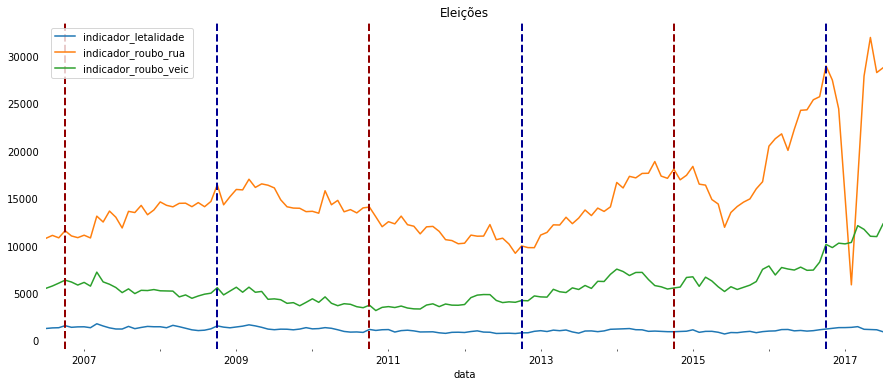

In [23]:
data_per100k.groupby(['data']).sum()[['indicador_letalidade','indicador_roubo_rua','indicador_roubo_veic']].plot(figsize=(15,6))

ax = plt.gca()

#06
ax.axvline(pd.to_datetime('2006-10-01'), color='#920000', linestyle='--', lw=2)

#08
ax.axvline(pd.to_datetime('2008-10-05'), color='#000092', linestyle='--', lw=2)

#10
ax.axvline(pd.to_datetime('2010-10-03'), color='#920000', linestyle='--', lw=2)

#12
ax.axvline(pd.to_datetime('2012-10-05'), color='#000092', linestyle='--', lw=2)

#14
ax.axvline(pd.to_datetime('2014-10-05'), color='#920000', linestyle='--', lw=2)

#16
ax.axvline(pd.to_datetime('2016-10-02'), color='#000092', linestyle='--', lw=2)


plt.tick_params(bottom='off', top='off', left='off', right='off')
for spine in ax.spines:
    ax.spines[spine].set_visible(False)
ax.set_title('Eleições')
plt.show()

### Acontecimentos

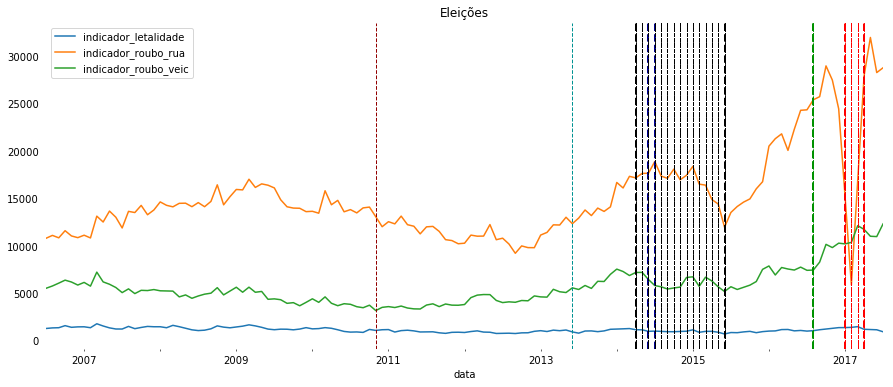

In [24]:
data_per100k.groupby(['data']).sum()[['indicador_letalidade','indicador_roubo_rua','indicador_roubo_veic']].plot(figsize=(15,6))

ax = plt.gca()

#Cerco Alemão - Vila Cruzeiro
ax.axvline(pd.to_datetime('2010-11-25'), color='#920000', linestyle='--', lw=1)

#Manifestações
ax.axvline(pd.to_datetime('2013-06-20'), color='#009292', linestyle='--', lw=1)

#copa 2014
mark_period(dt.datetime(2014,6,12), dt.datetime(2014,7,13), '#000092', interval=2)


#Ocupação da Maré
mark_period(dt.datetime(2014,4,5), dt.datetime(2015,6,30), '#000000', interval=2)

#olimpiadas
mark_period(dt.datetime(2016,8,15), dt.datetime(2016,8,21), '#009200', interval=2)

#Greve Polícia Civil
mark_period(dt.datetime(2017,1,20), dt.datetime(2017,4,7), 'r', interval=2)




plt.tick_params(bottom='off', top='off', left='off', right='off')
for spine in ax.spines:
    ax.spines[spine].set_visible(False)
ax.set_title('Eleições')
plt.show()

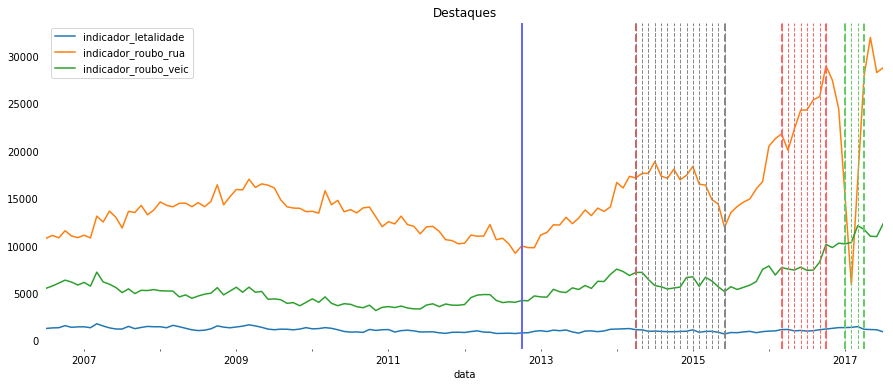

In [25]:
data_per100k.groupby(['data']).sum()[['indicador_letalidade','indicador_roubo_rua','indicador_roubo_veic']].plot(figsize=(15,6))

ax = plt.gca()

#Eleições Municipais de 2012
ax.axvline(pd.to_datetime('2012-10-05'), color='#6666FF', linestyle='-', lw=2)

#Ocupação da Maré
mark_period(dt.datetime(2014,4,5), dt.datetime(2015,6,30), '#888888')

#Renuncia Cabral e inicio do Governo Pezão
ax.axvline(pd.to_datetime('2014-04-3'), color='#CC6666', linestyle='--', lw=2)

#Greve Polícia Civil
mark_period(dt.datetime(2017,1,20), dt.datetime(2017,4,7), '#66CC66')



#Governo Dorneles
mark_period(dt.datetime(2016,3,28), dt.datetime(2016,10,31), '#FF6666')

plt.tick_params(bottom='off', top='off', left='off', right='off')
for spine in ax.spines:
    ax.spines[spine].set_visible(False)
ax.set_title('Destaques')
plt.show()

### Verificações 1
* A partir das eleiçoes Municipais de 2012, a taxa de criminalidade, especialmente a de roubos, apresentou acentuado crescimento.
* Sergio Cabral renuncia ao governo do estado, em favor de Pezão, dias antes da operação de ocupação do Complexo da Maré.
* Durante o período de ocupação do Complexo da Maré, ocorreu a estabilização e redução da taxa de roubos.
* Ao término da ocupação do Complexo da Maré, os índices de criminalidade dispararam, especialmente o de roubos e roubos de carros.
* Um dos períodos de maior crescimento da crimilidade foi durante a licença do Governador Luiz Fernando Pezão, sendo substituido interinamente por seu vice, Dorneles.
* No período de janeiro a abril de 2017, percebe-se uma queda drástica nos indices de roubo, retomando seu patamar em seguida. Tal fato se, na realidade, por conta da greve dos políciais civis. Com esta greve, somente foram realizados boletins de ocorrencia em casos flagrantes. Tais registros são a fonte primária dos dados desta análise.